In [1]:
import pandas as pd
import datetime

In [2]:
data_file = 'data/OnlineRetail.xlsx'
online = pd.read_excel(data_file, parse_dates=['InvoiceDate'])

In [3]:
online.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [4]:
online.dropna(inplace=True)

In [5]:
online.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [6]:
online.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [8]:
online[online['TotalSum'] < 0.0 ].head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  TotalSum  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom    -27.50  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom     -4.65  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom    -19.80  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom     -6.96  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom     -6.96

In [9]:
online = online.loc[~(online['TotalSum'] < 0)]
online[online['TotalSum'] < 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalSum]
Index: []

In [10]:
online.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSum  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     20.34

In [11]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalSum              float64
dtype: object

In [12]:
min_date = online.InvoiceDate.min()
max_date = online.InvoiceDate.max()
print(f'Min Date: {min_date} & Max Date: {max_date}')

Min Date: 2010-12-01 08:26:00 & Max Date: 2011-12-09 12:50:00


In [13]:
snapshot_date = max_date + datetime.timedelta(days=1)

In [14]:
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})

In [15]:
datamart[datamart['TotalSum'] < 0].head()

Empty DataFrame
Columns: [InvoiceDate, InvoiceNo, TotalSum]
Index: []

In [16]:
datamart.head()

InvoiceDate  InvoiceNo  TotalSum
CustomerID                                  
12346.0             326          1  77183.60
12347.0               2        182   4310.00
12348.0              75         31   1797.24
12349.0              19         73   1757.55
12350.0             310         17    334.40

In [17]:
datamart.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'MonetaryValue'
}, inplace=True)

In [18]:
datamart.head()

Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          1       77183.60
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40

In [19]:
"""
Quartiles - Recency
"""
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels=r_labels)
datamart = datamart.assign(R=r_quartiles.values)

In [20]:
datamart.head()

Recency  Frequency  MonetaryValue  R
CustomerID                                      
12346.0         326          1       77183.60  1
12347.0           2        182        4310.00  4
12348.0          75         31        1797.24  2
12349.0          19         73        1757.55  3
12350.0         310         17         334.40  1

In [21]:
"""
Quartiles - Freqency
"""
f_labels = range(1, 5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels=f_labels)
datamart['F'] = f_quartiles.values

In [22]:
"""
Quartiles - Monetary
"""
m_labels = range(1, 5)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels=m_labels)
datamart['M'] = m_quartiles.values

In [23]:
"""
Store this is raw data: for the particular time series data
"""
datamart.head()

Recency  Frequency  MonetaryValue  R  F  M
CustomerID                                            
12346.0         326          1       77183.60  1  1  4
12347.0           2        182        4310.00  4  4  4
12348.0          75         31        1797.24  2  2  4
12349.0          19         73        1757.55  3  3  4
12350.0         310         17         334.40  1  1  2

In [24]:
join_rfm = lambda x: str(x['R']) +  str(x['F']) +  str(x['M'])

In [25]:
"""
apply - across the columns
Look for other method also
"""
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)

In [26]:
datamart.head()

Recency  Frequency  MonetaryValue  R  F  M RFM_Segment
CustomerID                                                        
12346.0         326          1       77183.60  1  1  4         114
12347.0           2        182        4310.00  4  4  4         444
12348.0          75         31        1797.24  2  2  4         224
12349.0          19         73        1757.55  3  3  4         334
12350.0         310         17         334.40  1  1  2         112

In [27]:
datamart['RFM_Score'] = datamart[['R', 'F', 'M']].sum(axis=1)

In [28]:
datamart.head()

Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  RFM_Score
CustomerID                                                                   
12346.0         326          1       77183.60  1  1  4         114        6.0
12347.0           2        182        4310.00  4  4  4         444       12.0
12348.0          75         31        1797.24  2  2  4         224        8.0
12349.0          19         73        1757.55  3  3  4         334       10.0
12350.0         310         17         334.40  1  1  2         112        4.0

In [29]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    447
111    384
344    217
122    206
211    179
233    169
333    166
222    160
433    150
322    130
dtype: int64

In [30]:
datamart[datamart['RFM_Segment'] == '111'].count()

Recency          384
Frequency        384
MonetaryValue    384
R                384
F                384
M                384
RFM_Segment      384
RFM_Score        384
dtype: int64

In [31]:
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         260.8       8.2         158.9   384
4.0         175.7      13.6         239.6   383
5.0         154.3      21.4         368.5   516
6.0          96.3      27.9         824.0   461
7.0          79.1      38.5         755.5   459
8.0          64.6      56.8         994.1   454
9.0          46.0      80.0        1801.4   417
10.0         32.1     112.3        2049.4   426
11.0         21.1     187.7        4083.2   392
12.0          7.3     374.5        9319.2   447

In [32]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'

In [33]:
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

In [34]:
datamart.head()

Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                      
12346.0         326          1       77183.60  1  1  4         114        6.0   
12347.0           2        182        4310.00  4  4  4         444       12.0   
12348.0          75         31        1797.24  2  2  4         224        8.0   
12349.0          19         73        1757.55  3  3  4         334       10.0   
12350.0         310         17         334.40  1  1  2         112        4.0   

           General_Segment  
CustomerID                  
12346.0             Silver  
12347.0               Gold  
12348.0             Silver  
12349.0               Gold  
12350.0             Bronze

In [35]:
datamart.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            218.3      10.9         199.2   767
Gold               26.4     191.5        4393.9  1682
Silver            100.4      35.7         723.9  1890

In [36]:
datamart.head()

Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                      
12346.0         326          1       77183.60  1  1  4         114        6.0   
12347.0           2        182        4310.00  4  4  4         444       12.0   
12348.0          75         31        1797.24  2  2  4         224        8.0   
12349.0          19         73        1757.55  3  3  4         334       10.0   
12350.0         310         17         334.40  1  1  2         112        4.0   

           General_Segment  
CustomerID                  
12346.0             Silver  
12347.0               Gold  
12348.0             Silver  
12349.0               Gold  
12350.0             Bronze

In [37]:
datamart_rfm = datamart[['Recency', 'Frequency', 'MonetaryValue']]

In [38]:
datamart_rfm.head()

Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          1       77183.60
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40

In [39]:
datamart_rfm.describe()

Recency    Frequency  MonetaryValue
count  4339.000000  4339.000000    4339.000000
mean     92.518322    91.708689    2053.793018
std     100.009747   228.792852    8988.248381
min       1.000000     1.000000       0.000000
25%      18.000000    17.000000     307.245000
50%      51.000000    41.000000     674.450000
75%     142.000000   100.000000    1661.640000
max     374.000000  7847.000000  280206.020000

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

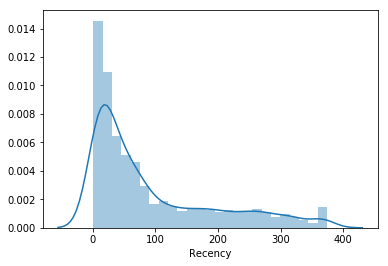

In [41]:
sns.distplot(datamart['Recency'])
plt.show()

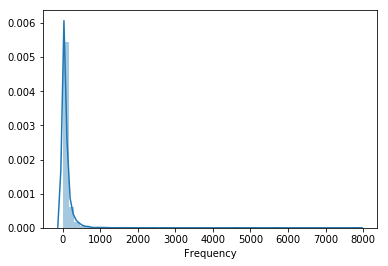

In [42]:
sns.distplot(datamart['Frequency'])
plt.show()

In [43]:
import numpy as np

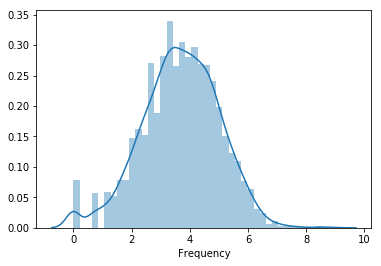

In [44]:
frequency_log = np.log(datamart['Frequency'])
sns.distplot(frequency_log)
plt.show()

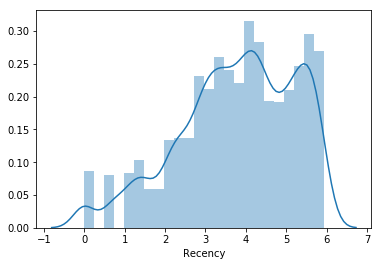

In [45]:
recency_log = np.log(datamart['Recency'])
sns.distplot(recency_log)
plt.show()

In [46]:
datamart_rfm.describe()

Recency    Frequency  MonetaryValue
count  4339.000000  4339.000000    4339.000000
mean     92.518322    91.708689    2053.793018
std     100.009747   228.792852    8988.248381
min       1.000000     1.000000       0.000000
25%      18.000000    17.000000     307.245000
50%      51.000000    41.000000     674.450000
75%     142.000000   100.000000    1661.640000
max     374.000000  7847.000000  280206.020000

In [47]:
datamart_centered = datamart_rfm - datamart_rfm.mean()
datamart_centered.describe().round(2)

Recency  Frequency  MonetaryValue
count  4339.00    4339.00        4339.00
mean      0.00       0.00          -0.00
std     100.01     228.79        8988.25
min     -91.52     -90.71       -2053.79
25%     -74.52     -74.71       -1746.55
50%     -41.52     -50.71       -1379.34
75%      49.48       8.29        -392.15
max     281.48    7755.29      278152.23

In [48]:
datamart_scaled = datamart_rfm / datamart_rfm.std()
datamart_scaled.describe().round(2)

Recency  Frequency  MonetaryValue
count  4339.00    4339.00        4339.00
mean      0.93       0.40           0.23
std       1.00       1.00           1.00
min       0.01       0.00           0.00
25%       0.18       0.07           0.03
50%       0.51       0.18           0.08
75%       1.42       0.44           0.18
max       3.74      34.30          31.17

In [49]:
"""
Ignore the warning!
We are explicitly converting it to float as scikit learn preprocessing implicitly converts int to float type
"""
datamart_rfm['Recency'] = datamart_rfm['Recency'].astype(float)
datamart_rfm['Frequency'] = datamart_rfm['Recency'].astype(float)

/Users/sanchitrk/Workspace/myspace/customer-segmentation-musings/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sanchitrk/Workspace/myspace/customer-segmentation-musings/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
datamart_rfm.head()

Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0       326.0      326.0       77183.60
12347.0         2.0        2.0        4310.00
12348.0        75.0       75.0        1797.24
12349.0        19.0       19.0        1757.55
12350.0       310.0      310.0         334.40

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)

In [52]:
datamart_normalized

array([[ 2.33485829e+00,  2.33485829e+00,  8.35963391e+00],
       [-9.05199314e-01, -9.05199314e-01,  2.51046358e-01],
       [-1.75186336e-01, -1.75186336e-01, -2.85464504e-02],
       ...,
       [-8.45198247e-01, -8.45198247e-01, -2.08712435e-01],
       [-8.85198958e-01, -8.85198958e-01,  4.57171586e-03],
       [-4.95192025e-01, -4.95192025e-01, -2.40912314e-02]])

In [53]:
mean = datamart_normalized.mean(axis=0).round(2)
std = datamart_normalized.std(axis=0).round(2)

print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: [ 0.  0. -0.]
Std: [1. 1. 1.]


In [54]:
"""
User segmentation
"""
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_

In [55]:
"""
Example of two clusters (randomly selected)
"""
datamart_rfm_k2 = datamart_rfm.assign(Cluster=cluster_labels)
datamart_rfm_k2.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         248.0     248.0         649.0  1073
1          41.0      41.0        2515.0  3266

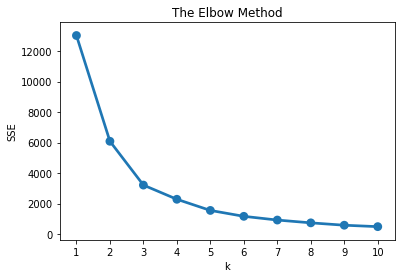

In [56]:
"""
Elbow criterion
"""
from sklearn.cluster import KMeans
import seaborn as sns 
from matplotlib import pyplot as plt

# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [57]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_

datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels)
datamart_rfm_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           6.0       6.0      172509.0     8
1          42.0      42.0        2097.0  3259
2         248.0     248.0         650.0  1072

In [58]:
datamart_normalized = pd.DataFrame(datamart_normalized, 
                                   index=datamart_rfm.index, 
                                   columns=datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']

In [59]:
datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Attribute', 
                    value_name='Value')

In [60]:
datamart_melt.head()

CustomerID  Cluster Attribute     Value
0     12346.0        2   Recency  2.334858
1     12347.0        1   Recency -0.905199
2     12348.0        1   Recency -0.175186
3     12349.0        1   Recency -0.735196
4     12350.0        2   Recency  2.174855

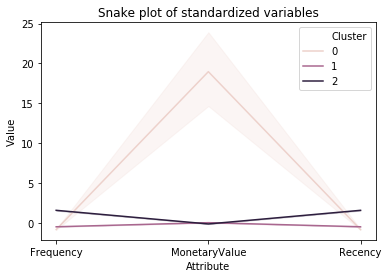

In [61]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)
plt.show()